In [1]:
import os, os.path
import glob
import pickle
import numpy
import numpy as np
from numpy.polynomial import Polynomial
from scipy import ndimage, signal, interpolate, integrate
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014,turn_physical_off, MiyamotoNagaiPotential
from galpy.util import bovy_conversion, save_pickles, bovy_coords, bovy_plot
import pal5_util
from gd1_util import R0, V0
import custom_stripping_df
import seaborn as sns
import astropy.units as u
from galpy import potential
from optparse import OptionParser
import argparse
from galpy.potential import DehnenBarPotential
import matplotlib.pyplot as plt

def galcencyl_to_lbd(R,phi,Z,degree=True):
    xyz=bovy_coords.galcencyl_to_XYZ(R,phi,Z)
    lbd=bovy_coords.XYZ_to_lbd(xyz[0],xyz[1],xyz[2],degree=degree)
    return lbd[0], lbd[1], lbd[2]


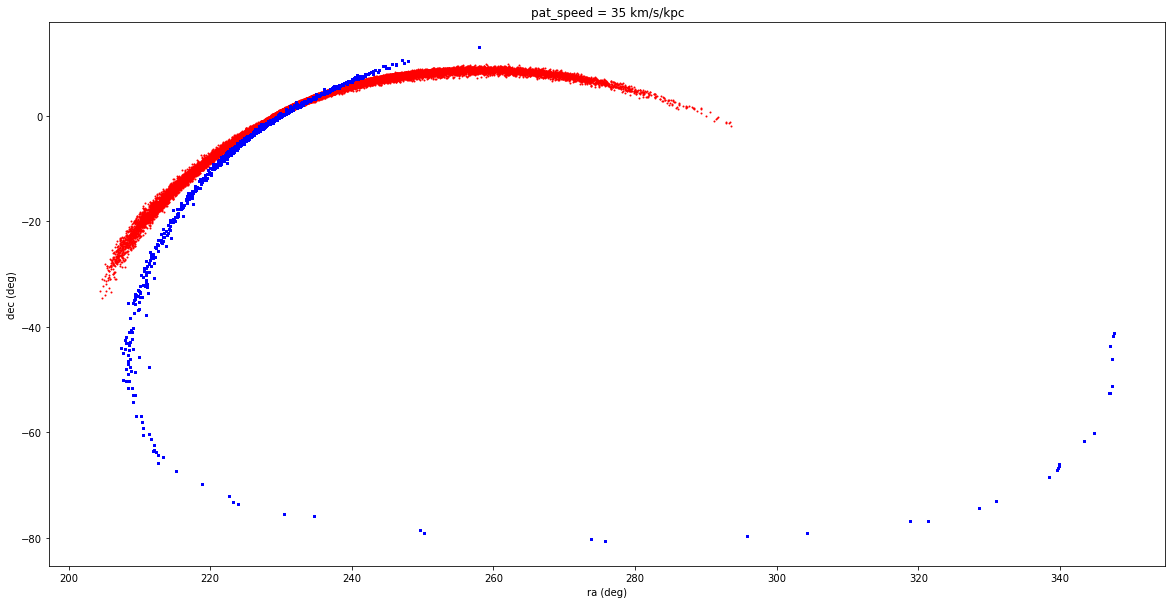

In [2]:
dir_trail='/home/nil/Dropbox/streamgap-pepper/test_weird_points/trailing/'

dir_lead = dir_trail.replace('trailing','leading')
allfname_trail= glob.glob(dir_trail + '*.dat')
allfname_lead= glob.glob(dir_lead + '*.dat')

R_t=[]
phi_t=[]
z_t=[]

R_l=[]
phi_l=[]
z_l=[]

for i in range(len(allfname_trail)):
        R_t.append(numpy.loadtxt(allfname_trail[i])[:,0])
        phi_t.append(numpy.loadtxt(allfname_trail[i])[:,1])
        z_t.append(numpy.loadtxt(allfname_trail[i])[:,2])
        
for ii in range(len(allfname_lead)):
        R_l.append(numpy.loadtxt(allfname_lead[i])[:,0])
        phi_l.append(numpy.loadtxt(allfname_lead[i])[:,1])
        z_l.append(numpy.loadtxt(allfname_lead[i])[:,2])
        
Rall_t = np.array([item for sublist in R_t for item in sublist])
phiall_t = np.array([item for sublist in phi_t for item in sublist])
zall_t = np.array([item for sublist in z_t for item in sublist])

Rall_l = np.array([item for sublist in R_l for item in sublist])
phiall_l = np.array([item for sublist in phi_l for item in sublist])
zall_l = np.array([item for sublist in z_l for item in sublist])


lt=np.empty(len(zall_t))
bt=np.empty(len(zall_t))

ll=np.empty(len(zall_t))
bl=np.empty(len(zall_t))

#convert to (l,b)

for ii in range(len(zall_l)):
    lt[ii]=galcencyl_to_lbd(Rall_t[ii],phiall_t[ii],zall_t[ii])[0]
    bt[ii]=galcencyl_to_lbd(Rall_t[ii],phiall_t[ii],zall_t[ii])[1]
    
    ll[ii]=galcencyl_to_lbd(Rall_l[ii],phiall_l[ii],zall_l[ii])[0]
    bl[ii]=galcencyl_to_lbd(Rall_l[ii],phiall_l[ii],zall_l[ii])[1]
    
    
radecpt=bovy_coords.lb_to_radec(lt,bt,degree=True)   
radecpl=bovy_coords.lb_to_radec(ll,bl,degree=True) 

#plot ra dec
plt.figure(figsize=(20,10))
plt.scatter(radecpt[:,0],radecpt[:,1],s=1,c='r',label='trailing')
plt.scatter(radecpl[:,0],radecpl[:,1],s=1,c='b',label='leading')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.title('pat_speed = 35 km/s/kpc')
plt.show()
